
<br>
Created on Fri Mar 30 12:39:26 2018<br>
This is the demo code. That should run without making any changes.<br>
Please ensure that demoImage.hdf5 is in the same directory as this file tstDemo.py.<br>
This code will load the learned model from the subdirectory 'savedModels'<br>
This test code will load an  image for  from the demoImage.hdf5 file.<br>
@author: haggarwal<br>


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import supportingFunctions as sf

In [2]:
cwd=os.getcwd()
tf.reset_default_graph()

% choose a model from savedModels directory

In [3]:
subDirectory='04Jun_0356pm_5L_10K_50E_AG'
#subDirectory='04Jun_0243pm_5L_1K_100E_AG'
#subDirectory='14Mar_1105pm'
#%%Read the testing data from dataset.hdf5 file

In [4]:
# addMasks = np.load('masks.npy')
# addImgs = np.load('images.npy')

stOrg is the original ground truth<br>
stAtb: it is the aliased/noisy image<br>
stCsm: this is coil sensitivity maps<br>
stMask: it is the undersampling mask

In [5]:
# addNum = 600
# addImg = addImgs[addNum,:,:]
# addMask = addMasks[addNum,:,:]

# newImg = sf.resize(addImg)   

# normAddImg = sf.normalize02(np.abs(newImg))
# normAddImg.shape


In [16]:
tstOrg,tstAtb,tstCsm,tstMask=sf.getAdditionalTestingData(imageNum = 800)

Reading the data. Please wait...
Elapsed time: 1.257685 seconds.

Successfully read the data from file!
Now doing undersampling....
Elapsed time: 0.159007 seconds.

Successfully undersampled data!


ou can also read more testing data from dataset.hdf5 (see readme) file using the command<br>
stOrg,tstAtb,tstCsm,tstMask=sf.getData('testing',num=100)

% Load existing model. Then do the reconstruction

In [17]:
print ('Now loading the model ...')

Now loading the model ...


In [18]:
modelDir= cwd+'/savedModels/'+subDirectory #complete path
rec=np.empty(tstAtb.shape,dtype=np.complex64) #rec variable will have output

In [19]:
tf.reset_default_graph()
loadChkPoint=tf.train.latest_checkpoint(modelDir)
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    new_saver = tf.train.import_meta_graph(modelDir+'/modelTst.meta')
    new_saver.restore(sess, loadChkPoint)
    graph = tf.get_default_graph()
    predT =graph.get_tensor_by_name('predTst:0')
    maskT =graph.get_tensor_by_name('mask:0')
    atbT=graph.get_tensor_by_name('atb:0')
    csmT   =graph.get_tensor_by_name('csm:0')
    wts=sess.run(tf.global_variables())
    dataDict={atbT:tstAtb,maskT:tstMask,csmT:tstCsm }
    rec=sess.run(predT,feed_dict=dataDict)

INFO:tensorflow:Restoring parameters from /home/bhofflic/BIPN 162 Final Project/savedModels/04Jun_0356pm_5L_10K_50E_AG/model-50


In [20]:
rec=sf.r2c(rec.squeeze())
print('Reconstruction done')

Reconstruction done


% normalize the data for calculating PSNR

In [21]:
print('Now calculating the PSNR (dB) values')

Now calculating the PSNR (dB) values


In [22]:
normOrg=sf.normalize01( np.abs(tstOrg))
normAtb=sf.normalize01( np.abs(sf.r2c(tstAtb)))
normRec=sf.normalize01(np.abs(rec))

In [23]:
psnrAtb=sf.myPSNR(normOrg,normAtb)
psnrRec=sf.myPSNR(normOrg,normRec)

In [24]:
print ('*****************')
print ('  ' + 'Noisy ' + 'Recon')
print ('  {0:.2f} {1:.2f}'.format(psnrAtb,psnrRec))
print ('*****************')

*****************
  Noisy Recon
  14.32 18.83
*****************


% Display the output images

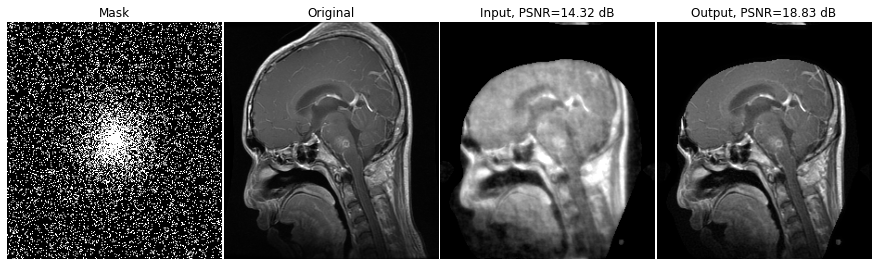

In [25]:
plot= lambda x: plt.imshow(x,cmap=plt.cm.gray, clim=(0.0, .8))
plt.clf()
plt.subplot(141)
plot(np.fft.fftshift(tstMask[0]))
plt.axis('off')
plt.title('Mask')
plt.subplot(142)
plot(normOrg)
plt.axis('off')
plt.title('Original')
plt.subplot(143)
plot(normAtb)
plt.title('Input, PSNR='+str(psnrAtb.round(2))+' dB' )
plt.axis('off')
plt.subplot(144)
plot(normRec)
plt.title('Output, PSNR='+ str(psnrRec.round(2)) +' dB')
plt.axis('off')
plt.subplots_adjust(left=0, right=2, top=1, bottom=0,wspace=.01)
plt.show()